# Accessing our local repository of Sentinel 2 Data

The purpose of this notebook is to introduce the sentinelPy module for data access

## 1. Importing

First we import the module as normal:

In [1]:
# Have created a symlink to the sentinelpy module directory
# need to merge the module into the main branch

import sentinelpy.sentinelPy as sp

# also import helpful modules
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle as p

The data are stored in the project directory

In [2]:
# set a temporary data path for my local copy

# on the unix system it should be
dpath = '/data/projects/orisa/JEDI/data_2'

Lets make a convenience function for making a list of paths to import

In [3]:
def make_file_list(dpath):
    """ Returns a list of .SAFE file paths"""
    contents = os.listdir(dpath)
    return [os.path.join(dpath,x) for x in contents if x.endswith('.SAFE')]

When importing as a sentinelTwoGranule, the file path and the MGRS grid square is needed to create a sentinelTwoGranule object

In [4]:
fpaths = make_file_list(dpath)

MGRS_square_ID = '38KRF' # identifies 100 Km x 100 Km square

def import_SAFE_list(fileList, squareID):
    """ Returns a list of SentinelTwoGranule objects"""
    return [sp.sentinelTwoGranule(x,squareID) for x in fileList]

files = import_SAFE_list(fpaths, MGRS_square_ID)

print(files[0])


Sentinel Level 2A SAFE Package
---------------------------
File location: /data/projects/orisa/JEDI/data_2/S2A_USER_PRD_MSIL2A_PDMC_20161102T145922_R120_V20161102T070232_20161102T070232.SAFE
Date: 2016-11-02


## 2. The sentinelTwoGranule object

This section details the various attributes of the sentinelTwoGranule object

In [5]:
eg = files[0]

### 2.1. Auxillary data

In [6]:
print('.SAFE root directory: {}\n\n\
Granule root directory: {}\n\n\
Image directory: {}\n\n\
Image capture date: {}\n\n\
MGRS grid square: {}'.format(eg.path,
                                    eg.granulePath,
                                    eg.imagePath,
                                    eg.captureDate,
                                    eg.mgrsGridSquare))

.SAFE root directory: /data/projects/orisa/JEDI/data_2/S2A_USER_PRD_MSIL2A_PDMC_20161102T145922_R120_V20161102T070232_20161102T070232.SAFE

Granule root directory: /data/projects/orisa/JEDI/data_2/S2A_USER_PRD_MSIL2A_PDMC_20161102T145922_R120_V20161102T070232_20161102T070232.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_SGS__20161102T115520_A007124_T38KRF_N02.04

Image directory: /data/projects/orisa/JEDI/data_2/S2A_USER_PRD_MSIL2A_PDMC_20161102T145922_R120_V20161102T070232_20161102T070232.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_SGS__20161102T115520_A007124_T38KRF_N02.04/IMG_DATA

Image capture date: 2016-11-02

MGRS grid square: 38KRF


### 2.2. Imagery Layers

All imagery data are stored using the msiFile class, a subclass of the base sentinelTwoImage class, used for handing any gridded pixel data.

Each sentinel granule has a dictionary that contains multiple msiFile objects. Each instance allows access to a band, indexed by its name. For instance, if we want to access the blue imagery band in the example sentinel 2 granule we specified above as 'eg', we use

In [7]:
blue_band = eg.msiBands['B02']

Each msiFile object also has a number of text attributes:

In [8]:
print('Band Name: {}\n\n\
File path: {}\n\n\
Process Level: {}\n\n\
Pixel ground size (length and width in metres): {} '.format(blue_band.bandName,
                            blue_band.filePath,
                            blue_band.processLevel,
                            blue_band.pixelSize))

Band Name: B02

File path: /data/projects/orisa/JEDI/data_2/S2A_USER_PRD_MSIL2A_PDMC_20161102T145922_R120_V20161102T070232_20161102T070232.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_SGS__20161102T115520_A007124_T38KRF_N02.04/IMG_DATA/R10m/S2A_USER_MSI_L2A_TL_SGS__20161102T115520_A007124_T38KRF_B02_10m.jp2

Process Level: Level-2Ap

Pixel ground size (length and width in metres): 10 


So we can see that the blue band in this sentinel granule has been processed to the level 2A processing stage and that the data is stored in a .jp2 (JPEG 2000 format file). We can also see that this image is at 10m x 10m resolution.

We can access the pixel values of the layer through the data attribute, a NumPy-like 2D array. Note that the pixel array is not read into memory until needed (i.e. when an operation is performed on the array).

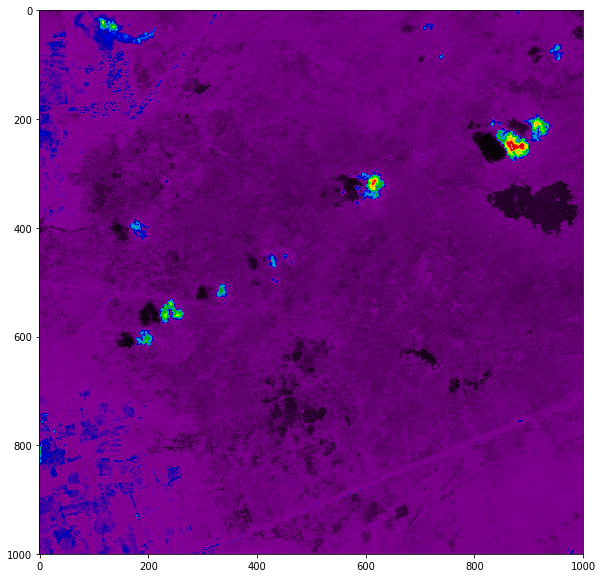

In [9]:
# make a spatial subset of blue

bb = blue_band.data[5000:6000,5000:6000]

# make a plot
plt.figure(figsize = (10,10))
plt.imshow(bb,'nipy_spectral')
plt.show()

You'll notice some white blobs - these are clouds and so are much more reflective than the ground. As such, the ground appears very dark (on our chosen colour scale) and so we can temporarily overcome this by plotting the log instead:

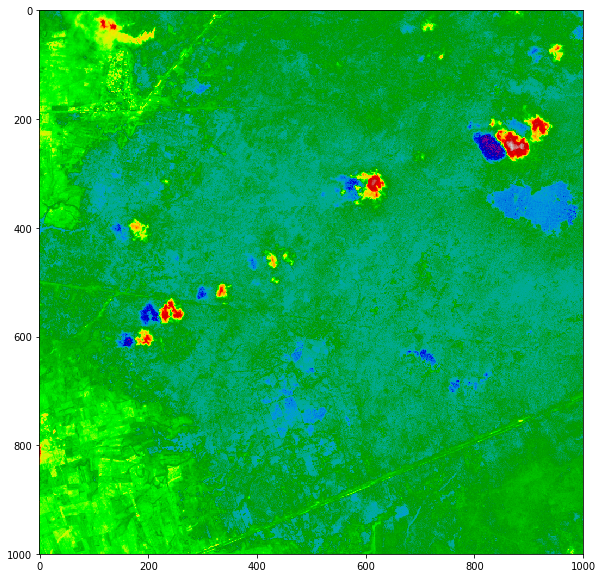

In [10]:
# make a plot
plt.figure(figsize = (10,10))
plt.imshow(np.log(bb),'nipy_spectral')
plt.show()

### 2.3. Scene Classification Layer data

There is also a second kind of gridded data in the sentinel files. A pre-generated Scene Classification Layer (SCL) is also produced during ESA's processing to level 1C. This is represented as an sclFile object, also a subclass of the sentinelTwoImage class.

This can be accessed by:

In [11]:
print('Band Name: {}\n\n\
File path: {}\n\n\
Process Level: {}\n\n\
Pixel ground size (length and width in metres): {} '.format(eg.SCL.bandName,
                            eg.SCL.filePath,
                            eg.SCL.processLevel,
                            eg.SCL.pixelSize))

Band Name: Scene Classification Layer

File path: /data/projects/orisa/JEDI/data_2/S2A_USER_PRD_MSIL2A_PDMC_20161102T145922_R120_V20161102T070232_20161102T070232.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_SGS__20161102T115520_A007124_T38KRF_N02.04/IMG_DATA/S2A_USER_SCL_L2A_TL_SGS__20161102T115520_A007124_T38KRF_20m.jp2

Process Level: Level-2Ap

Pixel ground size (length and width in metres): 20 


We can see that this layer only comes in 20m x 20m pixels

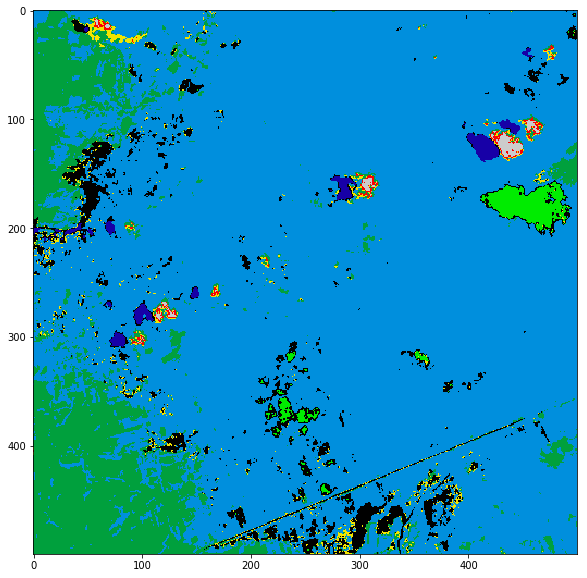

In [12]:
# make a spatial subset of scl

scl = eg.SCL.data[2500:3000,2500:3000]

# make a plot
plt.figure(figsize = (10,10))
plt.imshow(scl,'nipy_spectral')
plt.show()

In this plot, each colour represents a different classification

In [13]:
eg.SCL.layerNames

{0: 'NODATA',
 1: 'SATURATED_DEFECTIVE',
 2: 'DARK_FEATURE_SHADOW',
 3: 'CLOUD_SHADOW',
 4: 'VEGETATION',
 5: 'BARE_SOIL_DESERT',
 6: 'WATER',
 7: 'CLOUD_LOW_PROBA',
 8: 'CLOUD_MEDIUM_PROBA',
 9: 'CLOUD_HIGH_PROBA',
 10: 'THIN_CIRRUS',
 11: 'SNOW_ICE'}

## 3. Some very useful stuff...

### 3.1. Masking out clouds
Using the SCL, we can make a boolean array of a single classification type. Lets test this out by setting all pixels equivalent to 4 (the vegetation code) to true, and all others to False

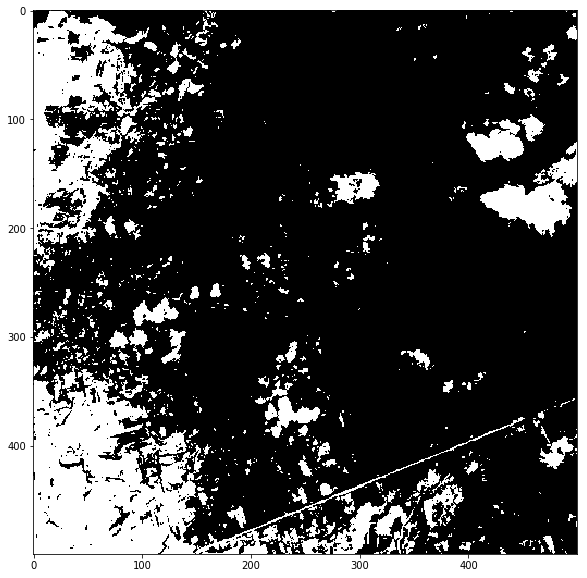

In [ ]:
vegetation = scl==4

# make a plot
plt.figure(figsize = (10,10))
plt.imshow(vegetation,'binary')
plt.show()

We can then use this to make a masked array of an imagery band. For example, lets mask out all values which are not vegetation in our blue band. There's two things that we need to consider:

- Resampling: Our blue band is imaged at 10m x 10m pixels, however our SCL is at 20m x 20m. This is fairly easy to resolve because we can simply stride the blue band array (take every other value in both dimensions).

- in masked array syntax, a true value in a mask means that the value is masked out. We can simply subtract 1 to invert the logic of the vegetation array

In [ ]:
bb_masked = np.ma.array(bb[::2,::2],mask=vegetation-1)

# make a plot
plt.figure(figsize = (10,10))
plt.imshow(np.log(bb_masked),'nipy_spectral')
plt.show()

### 3.2. Making an RGB image

In [ ]:
# Stack up the RGB bands and reshape into the expected shape for an RGB image
stack = np.stack([eg.msiBands['B04'].data[5000:6000,5000:6000],
                  eg.msiBands['B03'].data[5000:6000,5000:6000],
                  eg.msiBands['B02'].data[5000:6000,5000:6000]]).transpose(1,2,0)

# load some pre calculated histogram values
cdf, bins = p.load(open('sentinelpy/imProfile.p', 'rb'))

# apply a histogram equalisation
rgb,_,_ = sp.image_histogram_equalization(stack, cdf=cdf, bins=bins)
rgb = rgb.astype('uint8')

# make a plot
plt.figure(figsize = (10,10))
plt.imshow(rgb)
plt.show()

### Closing remarks
There is other useful functionality in the package, however this is not discussed here but can be found in 'sentinelPy/UserGuide.ipynb'